In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.optimize import broyden1

In [2]:
A11 = np.array([[0.45, 0.25], [0.15, 0.45]])
A12 = np.array([[0.25, 0.25]]).T
A21 = np.array([[0.15, 0.05]])
A22 = np.array([0.35])

B1 = np.array([[0.25, 0.35], [0.65, 0.15]])
B2 = np.array([[0.1, 0.05]]).T

x1_0 = np.array([[3550, 1750]]).T

def c1(t):
    return np.array([850, 550]) * np.exp(0.025*t)
    
c2 = 75

In [3]:
A22_neg_inv = np.linalg.inv(np.eye(1) - A22)
A1 = A11 + np.dot(np.dot(A12, A22_neg_inv), A21)
B = B1 + np.dot(np.dot(B2, A22_neg_inv), A21)

def c(t):
    return c1(t) - np.dot(A22_neg_inv.T, A12.T).reshape(A12.shape[0]) * c2

In [4]:
B_inv = np.linalg.inv(B)
A1_neg_inv = np.linalg.inv(np.eye(A1.shape[0]) - A1)

def x_der(t, x):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

def x_der_change_params(x, t = 0):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

In [5]:
t = np.linspace(1, 10, 10)
x1 = solve_ivp(x_der, [1, 10], np.array([3550, 1750]), t_eval=t).y
x2 = np.dot(A22_neg_inv, (np.dot(A21, x1) - c2))
print(x1)

[[3550.         3307.69463124 3427.90806514 3598.47070813 3811.71773205
  4084.03487099 4445.7337662  4932.03559713 5597.89591791 6525.20833033]
 [1750.         2474.46950298 2633.03501587 2783.51690952 2972.49637834
  3220.56781044 3546.59911285 3993.32832852 4616.66649301 5494.80202871]]


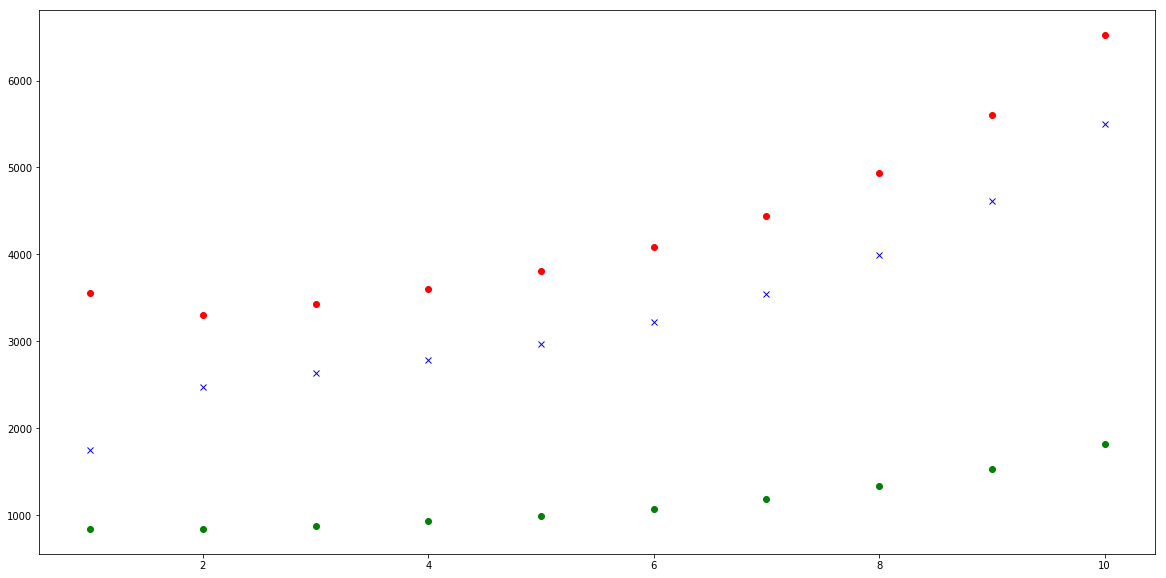

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(t, x1[0], 'ro', t, x1[1], 'bx', t, x2[0], 'go')
plt.show()

In [7]:
y1_0 = np.dot((np.eye(A1.shape[0]) - A1), x1_0)
y1_0

array([[1276.53846154],
       [ 191.53846154]])

In [8]:
p1 = broyden1(x_der_change_params, [1, 1])
print('Точка спокою загальної системи: {}'.format(p1))

Точка спокою загальної системи: [2805.24344386 2079.58801269]


In [9]:
def y_der(t, y):
    return np.dot(np.dot(np.eye(A1.shape[0]) - A1, B_inv), y) 

In [10]:
y1 = solve_ivp(y_der, [1, 10], [3550, 1750], t_eval=t).y
print(y1)

[[ 3550.          3538.22398939  5055.33190581  7356.02945239
  10714.59153106 15597.64211781 22719.68443817 33115.08477008
  48227.67763495 70212.96821049]
 [ 1750.          4460.64311496  6611.25178432  9636.74597497
  14034.04259497 20448.33660907 29778.83512322 43340.99079924
  63125.82522697 91970.79653559]]


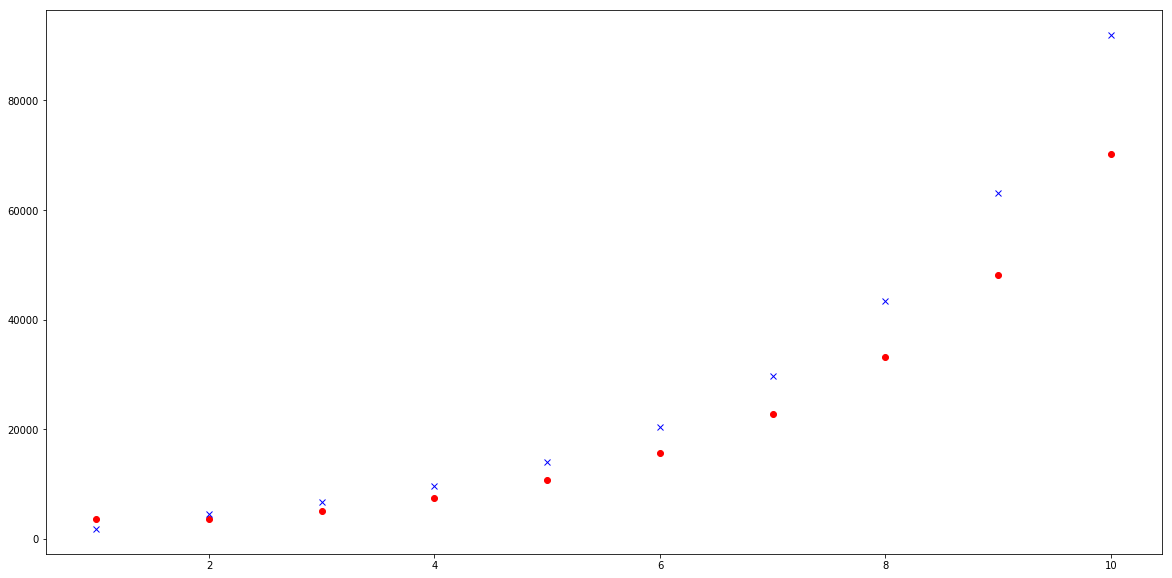

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(t, y1[0], 'ro', t, y1[1], 'bx')
plt.show()

In [14]:
eigen_values, vector = np.linalg.eig(np.dot(A1_neg_inv, B))
print(np.dot(A1_neg_inv, B))
tech_growth = 1.0 / np.max(eigen_values)
print(tech_growth)

TIME_RANGE = 10

X1_tech_growth = [[3550, 1750]]
st = 1e-3
eps = 1e-3

while st < TIME_RANGE + 2.0:
    new_X1 = np.dot(X1_tech_growth[0], np.exp(tech_growth * st))
    X1_tech_growth.append(new_X1)
    st += eps
print( X1_tech_growth)

[[1.57288966 1.12604437]
 [1.86185537 0.73048113]]
0.375989906283497
[[3550, 1750], array([3551.33501513, 1750.65810605]), array([3552.6705323 , 1751.31645959]), array([3554.00655171, 1751.9750607 ]), array([3555.34307355, 1752.63390949]), array([3556.68009799, 1753.29300605]), array([3558.01762524, 1753.95235047]), array([3559.35565548, 1754.61194284]), array([3560.6941889 , 1755.27178326]), array([3562.03322569, 1755.93187182]), array([3563.37276604, 1756.59220861]), array([3564.71281014, 1757.25279373]), array([3566.05335818, 1757.91362727]), array([3567.39441034, 1758.57470932]), array([3568.73596682, 1759.23603998]), array([3570.07802781, 1759.89761934]), array([3571.42059349, 1760.5594475 ]), array([3572.76366406, 1761.22152454]), array([3574.1072397 , 1761.88385056]), array([3575.45132062, 1762.54642566]), array([3576.79590698, 1763.20924992]), array([3578.14099899, 1763.87232345]), array([3579.48659684, 1764.53564633]), array([3580.83270072, 1765.19921866]), array([3582.1793108

[3550.         3307.69463124 3427.90806514 3598.47070813 3811.71773205
 4084.03487099 4445.7337662  4932.03559713 5597.89591791 6525.20833033]


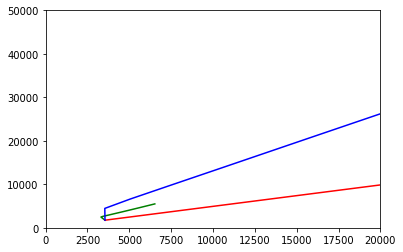

In [25]:
plt.plot(x1[0], x1[1], 'g',
        [x1_tg[0] for x1_tg in X1_tech_growth], [x1_tg[1] for x1_tg in X1_tech_growth], 'r',
        y1[0], y1[1], 'b')
plt.axis([0, 20000, 0, 50000])
print(x1[0])
plt.show()